In [1]:
import pandas as pd  # type: ignore
import numpy as np # type: ignore
import os
import shutil
import random
import cv2 # type: ignore
import matplotlib.pyplot as plt # type: ignore
import tensorflow as tf # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input,Dropout # type: ignore
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint # type: ignore
from sklearn.ensemble import RandomForestClassifier # type: ignore
from sklearn.tree import DecisionTreeClassifier # type: ignore
from sklearn.metrics import confusion_matrix # type: ignore
import seaborn as sns  # type: ignore
from sklearn.linear_model import LogisticRegression # type: ignore
from sklearn.svm import SVC # type: ignore
from sklearn.metrics import accuracy_score # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore



In [4]:
# Make a folder name data
os.makedirs('data_copy', exist_ok=True)

In [3]:
# Make a folder name test and train in data_copy folder
os.makedirs('data_copy/test', exist_ok=True)
os.makedirs('data_copy/train', exist_ok=True)


In [4]:
# Make a folder name DROWSY And NATURAL in test and train folder
os.makedirs('data_copy/test/DROWSY', exist_ok=True)
os.makedirs('data_copy/test/NATURAL', exist_ok=True)
os.makedirs('data_copy/train/DROWSY', exist_ok=True)
os.makedirs('data_copy/train/NATURAL', exist_ok=True)


In [5]:
# Copy the images from the original folder to the new folder
for i in os.listdir('Drowsy_datset/test/DROWSY'):
    shutil.copy(f'Drowsy_datset/test/DROWSY/{i}', 'data_copy/test/DROWSY')
for i in os.listdir('Drowsy_datset/test/NATURAL'):
    shutil.copy(f'Drowsy_datset/test/NATURAL/{i}', 'data_copy/test/NATURAL')
for i in os.listdir('Drowsy_datset/train/DROWSY'):
    shutil.copy(f'Drowsy_datset/train/DROWSY/{i}', 'data_copy/train/DROWSY')
for i in os.listdir('Drowsy_datset/train/NATURAL'):
    shutil.copy(f'Drowsy_datset/train/NATURAL/{i}', 'data_copy/train/NATURAL')

In [7]:
# Rename the images in the folder data_copy to im_0001, im_0002, im_0003, etc
for i, j in enumerate(os.listdir('data_copy/test/DROWSY')):
    os.rename(f'data_copy/test/DROWSY/{j}', f'data_copy/test/DROWSY/im_{i:04}.png')
for i, j in enumerate(os.listdir('data_copy/test/NATURAL')):
    os.rename(f'data_copy/test/NATURAL/{j}', f'data_copy/test/NATURAL/im_{i:04}.png')
for i, j in enumerate(os.listdir('data_copy/train/DROWSY')):
    os.rename(f'data_copy/train/DROWSY/{j}', f'data_copy/train/DROWSY/im_{i:04}.png')
for i, j in enumerate(os.listdir('data_copy/train/NATURAL')):
    os.rename(f'data_copy/train/NATURAL/{j}', f'data_copy/train/NATURAL/im_{i:04}.png')
    

In [13]:
# Resize all image to 48x48
for i in os.listdir('data_copy/test/DROWSY'):
    img = cv2.imread(f'data_copy/test/DROWSY/{i}')
    img = cv2.resize(img, (48, 48))
    cv2.imwrite(f'data_copy/test/DROWSY/{i}', img)
for i in os.listdir('data_copy/test/NATURAL'):
    img = cv2.imread(f'data_copy/test/NATURAL/{i}')
    img = cv2.resize(img, (48, 48))
    cv2.imwrite(f'data_copy/test/NATURAL/{i}', img)
for i in os.listdir('data_copy/train/DROWSY'):
    img = cv2.imread(f'data_copy/train/DROWSY/{i}')
    img = cv2.resize(img, (48, 48))
    cv2.imwrite(f'data_copy/train/DROWSY/{i}', img)
for i in os.listdir('data_copy/train/NATURAL'):
    img = cv2.imread(f'data_copy/train/NATURAL/{i}')
    img = cv2.resize(img, (48, 48))
    cv2.imwrite(f'data_copy/train/NATURAL/{i}', img)



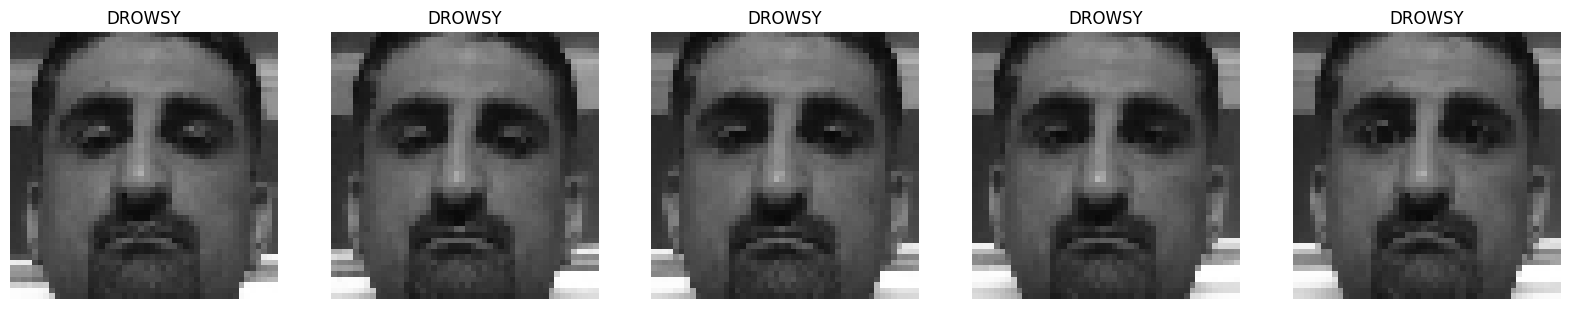

In [6]:
# Load the 5 images use 5 columns 1 row
fig, ax = plt.subplots(1, 5, figsize=(20, 20))
for i, j in enumerate(os.listdir(r'C:\Users\pron\Documents\I4-AMS\Research_Method\Project_Drowsy_Driver_Alert\data_copy\test\DROWSY')[:5]):
    ax[i].imshow(cv2.imread(r'C:\Users\pron\Documents\I4-AMS\Research_Method\Project_Drowsy_Driver_Alert\data_copy\test\DROWSY\{}'.format(j)))
    ax[i].axis('off')
    ax[i].set_title('DROWSY')
plt.show()


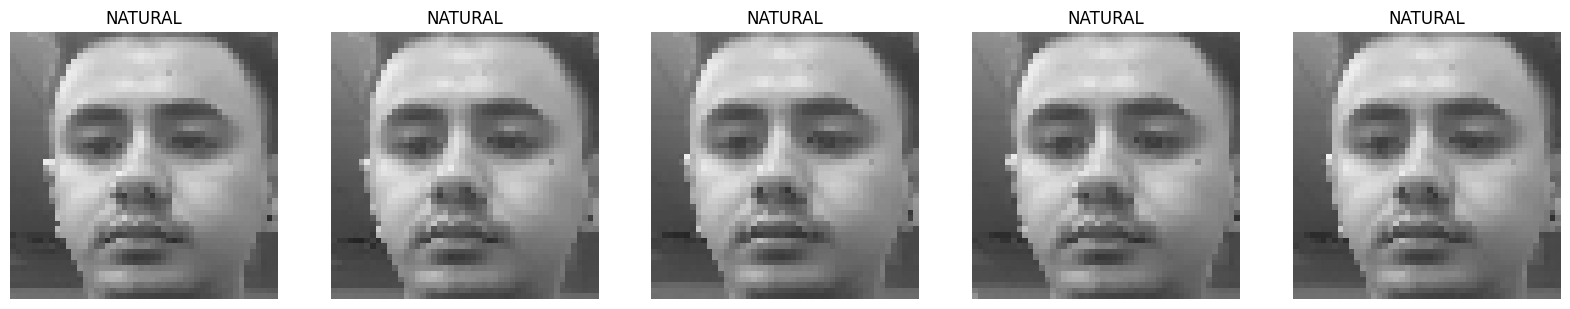

In [8]:
# Load the 5 images use 5 columns 1 row
fig, ax = plt.subplots(1, 5, figsize=(20, 20))
for i, j in enumerate(os.listdir(r'C:\Users\pron\Documents\I4-AMS\Research_Method\Project_Drowsy_Driver_Alert\data_copy\train\NATURAL')[:5]):
    ax[i].imshow(cv2.imread(r'C:\Users\pron\Documents\I4-AMS\Research_Method\Project_Drowsy_Driver_Alert\data_copy\train\NATURAL\{}'.format(j)))
    ax[i].axis('off')
    ax[i].set_title('NATURAL')
plt.show()


In [10]:
# Show image size
img = cv2.imread(r'C:\Users\pron\Documents\I4-AMS\Research_Method\Project_Drowsy_Driver_Alert\data_copy\train\NATURAL\im_0000.png')
img.shape

(48, 48, 3)

Found 6764 images belonging to 2 classes.
Found 2402 images belonging to 2 classes.


c:\Users\pron\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


c:\Users\pron\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


212/212 ━━━━━━━━━━━━━━━━━━━━ 27s 108ms/step - accuracy: 0.6022 - loss: 0.6417 - val_accuracy: 0.7394 - val_loss: 0.5825
Epoch 2/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.8141 - loss: 0.4167 - val_accuracy: 0.7852 - val_loss: 0.6356
Epoch 3/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - accuracy: 0.8700 - loss: 0.3107 - val_accuracy: 0.8281 - val_loss: 0.4689
Epoch 4/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - accuracy: 0.8978 - loss: 0.2518 - val_accuracy: 0.8501 - val_loss: 0.4078
Epoch 5/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.9301 - loss: 0.1991 - val_accuracy: 0.8672 - val_loss: 0.3852
Epoch 6/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 16s 75ms/step - accuracy: 0.9299 - loss: 0.1895 - val_accuracy: 0.9176 - val_loss: 0.2645
Epoch 7/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - accuracy: 0.9437 - loss: 0.1494 - val_accuracy: 0.9288 - val_loss: 0.2465
Epoch 8/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - accuracy: 0.9522 - loss: 0.1262 - val_accura

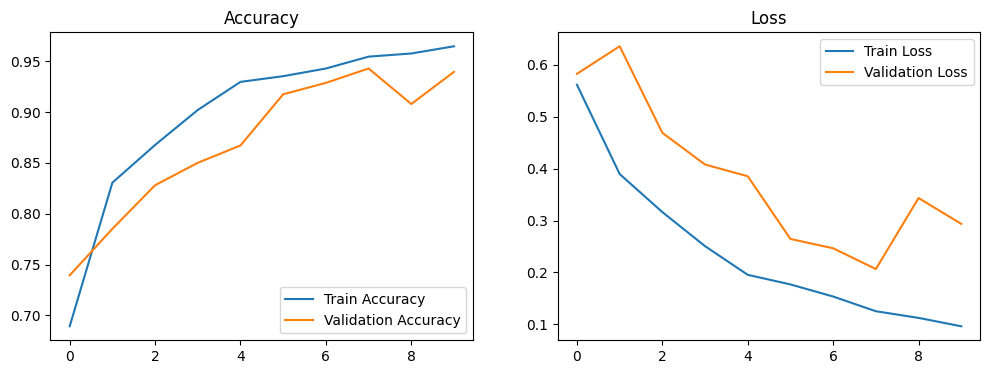

In [12]:


# Paths
train_dir = r'C:\Users\pron\Documents\I4-AMS\Research_Method\Project_Drowsy_Driver_Alert\data_copy\train'
test_dir =  r'C:\Users\pron\Documents\I4-AMS\Research_Method\Project_Drowsy_Driver_Alert\data_copy\test'

# Data Preprocessing
train_datagen = ImageDataGenerator(rescale=1.0/255.0, horizontal_flip=True, zoom_range=0.2, rotation_range=20)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(48, 48), 
    batch_size=32, 
    class_mode='binary'
)
test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(48, 48), 
    batch_size=32, 
    class_mode='binary'
)

# Model Definition
# Model Definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])
# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the Model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# Evaluate the Model
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Plot Training History


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()
# Save best performing model
model.save('model.h5')


In [4]:
# Save best performing model
model.save('model.h5')


In [2]:


# Load the data_copy
X_train = []
y_train = []
for file in os.listdir('data_copy/train/DROWSY'):
    img = cv2.imread(f'data_copy/train/DROWSY/{file}')
    X_train.append(img.flatten())
    y_train.append(1)
for file in os.listdir('data_copy/train/NATURAL'):
    img = cv2.imread(f'data_copy/train/NATURAL/{file}')
    X_train.append(img.flatten())
    y_train.append(0)

X_test = []
y_test = []
for file in os.listdir('data_copy/test/DROWSY'):
    img = cv2.imread(f'data_copy/test/DROWSY/{file}')
    X_test.append(img.flatten())
    y_test.append(1)
for file in os.listdir('data_copy/test/NATURAL'):
    img = cv2.imread(f'data_copy/test/NATURAL/{file}')
    X_test.append(img.flatten())
    y_test.append(0)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


In [3]:

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data to match the input shape of the neural network
X_train = X_train.reshape(X_train.shape[0], 48 * 48 * 3)
X_test = X_test.reshape(X_test.shape[0], 48 * 48 * 3)

# Ensure labels are reshaped to match the output layer
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Neural Network Class
class NeuralNetwork:
    def __init__(self):
        self.w1 = np.random.randn(48 * 48 * 3, 128) * 0.01  # Weight initialization
        self.b1 = np.zeros((1, 128))
        self.w2 = np.random.randn(128, 1) * 0.01  # Output layer weight
        self.b2 = np.zeros((1, 1))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, x):
        self.z1 = np.dot(x, self.w1) + self.b1  # Hidden layer input
        self.a1 = self.sigmoid(self.z1)         # Hidden layer activation
        self.z2 = np.dot(self.a1, self.w2) + self.b2  # Output layer input
        self.a2 = self.sigmoid(self.z2)         # Output layer activation
        return self.a2

    def backward(self, x, y, output, lr):
        error = y - output
        d_output = error * self.sigmoid_derivative(output)  # Derivative of output layer
        error_hidden = d_output.dot(self.w2.T)             # Backprop error to hidden layer
        d_hidden = error_hidden * self.sigmoid_derivative(self.a1)  # Derivative of hidden layer

        # Update weights and biases
        self.w1 += x.T.dot(d_hidden) * lr
        self.b1 += np.sum(d_hidden, axis=0, keepdims=True) * lr
        self.w2 += self.a1.T.dot(d_output) * lr
        self.b2 += np.sum(d_output, axis=0, keepdims=True) * lr

    def train(self, X, y, epochs, lr, batch_size):
        num_samples = X.shape[0]
        for epoch in range(epochs):
            # Shuffle the data at the start of each epoch
            indices = np.arange(num_samples)
            np.random.shuffle(indices)
            X = X[indices]
            y = y[indices]

            # Process each batch
            for i in range(0, num_samples, batch_size):
                X_batch = X[i:i + batch_size]
                y_batch = y[i:i + batch_size]

                # Forward and backward pass
                output = self.forward(X_batch)
                self.backward(X_batch, y_batch, output, lr)

            # Print loss for the epoch
            output = self.forward(X)
            loss = np.mean((y - output) ** 2)
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss}")

    def predict(self, X):
        return np.round(self.forward(X))


# Train the Neural Network
nn = NeuralNetwork()
batch_size = 64  # Set batch size
nn.train(X_train, y_train, epochs=100, lr=0.001, batch_size=batch_size)

# Predict on the test set
y_pred = nn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Epoch 1/100, Loss: 0.24795787346723058
Epoch 2/100, Loss: 0.24430666900281783
Epoch 3/100, Loss: 0.2372607615153999
Epoch 4/100, Loss: 0.22501105548474343
Epoch 5/100, Loss: 0.20857012367561176
Epoch 6/100, Loss: 0.19335569504942873
Epoch 7/100, Loss: 0.18132025308995423
Epoch 8/100, Loss: 0.1731839131430944
Epoch 9/100, Loss: 0.1658733710572168
Epoch 10/100, Loss: 0.16073109854033862
Epoch 11/100, Loss: 0.1564918151905129
Epoch 12/100, Loss: 0.15282129176969755
Epoch 13/100, Loss: 0.14956424812733665
Epoch 14/100, Loss: 0.14925274963252874
Epoch 15/100, Loss: 0.14545752293976674
Epoch 16/100, Loss: 0.14240533274238934
Epoch 17/100, Loss: 0.14312048672817698
Epoch 18/100, Loss: 0.13789574783428776
Epoch 19/100, Loss: 0.13673302885230093
Epoch 20/100, Loss: 0.13331432212174543
Epoch 21/100, Loss: 0.1319254368912616
Epoch 22/100, Loss: 0.13036115909213244
Epoch 23/100, Loss: 0.1295282092864555
Epoch 24/100, Loss: 0.12827475564562876
Epoch 25/100, Loss: 0.12482760307233803
Epoch 26/100, L

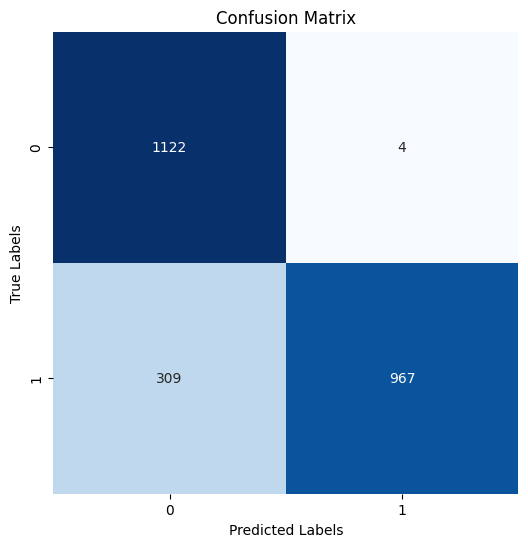

In [4]:
# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [5]:

# Logistic Regression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
accuracy_score(y_test, y_pred)

c:\Users\pron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\pron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.861781848459617

In [6]:

# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy_score(y_test, y_pred)


c:\Users\pron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8692756036636137

In [7]:

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

c:\Users\pron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8272273105745213

In [8]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.8193172356369692

In [9]:

# Make a prediction function Drwosy or NonDrowsy
def predict_image(path):
    img = cv2.imread(path)
    img = cv2.resize(img, (48, 48))  # Resize the image to 48x48
    img = img / 255.0  # Normalize the image
    img = img.reshape(1, 48, 48, 3)  # Reshape to (1, 48, 48, 3)
    prediction = model.predict(img)
    if prediction >= 0.5:
        print('Drowsy')
    else:
        print('NonDrowsy')

predict_image('data_copy/test/DROWSY/im_0008.png')


NameError: name 'model' is not defined

In [48]:

# Make a prediction function Drowsy or NonDrowsy
def predict_image(path):
    img = cv2.imread(path)
    img = cv2.resize(img, (48, 48))  # Resize the image to 48x48
    img = img / 255.0  # Normalize the image
    img = img.flatten().reshape(1, 48 * 48 * 3)  # Flatten and reshape to (1, 48 * 48 * 3)
    nn = NeuralNetwork()  # Create an instance of NeuralNetwork
    prediction = nn.predict(img)
    if prediction >= 0.5:
        print('Drowsy')
    else:
        print('NonDrowsy')

predict_image('data_copy/test/NATURAL/im_0008.png')


NonDrowsy


In [50]:
model.save('model.keras')  # Save the model